# Parameter estimation
Given $L$ realizations $\{ v_i | i \in \{ 1,\dots,L \} \}$ of the random field $Y$ the sample means
$$
    \mu^{(j)} = \frac{1}{L} \sum\limits_{k=1}^L v_k^{(j)}
$$
and the entries of the sample covariance matrix
$$
    Cov(j,k) = \frac{1}{L-1} \sum\limits_{l=1}^L \left( v_l^{(j)} - \mu^{(j)} \right)\left( v_l^{(k)} - \mu^{(k)} \right)
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import netCDF4 as nc

In [2]:
ds = nc.Dataset('../../Data/Weather/day20_850_temp.nc')

In [3]:
cnrm = data=ds['cnrm'][0]
print(cnrm.shape)

(9, 73, 144)


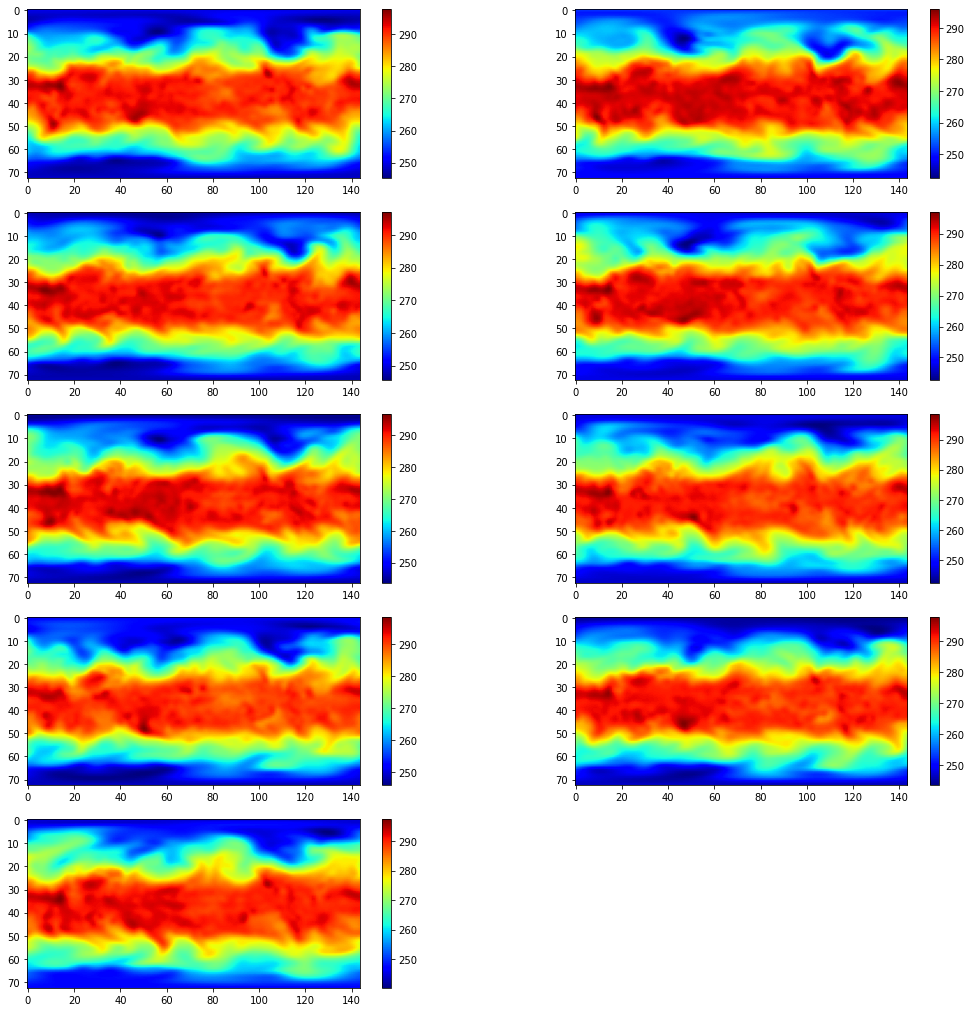

In [4]:
plt.figure(figsize=(18,6*3))
for i in range(cnrm.shape[0]):
    plt.subplot(np.int32(np.ceil(cnrm.shape[0]/2.)),2,i+1)
    plt.imshow(cnrm[i,:,:], cmap='jet')
    plt.colorbar()
plt.show()

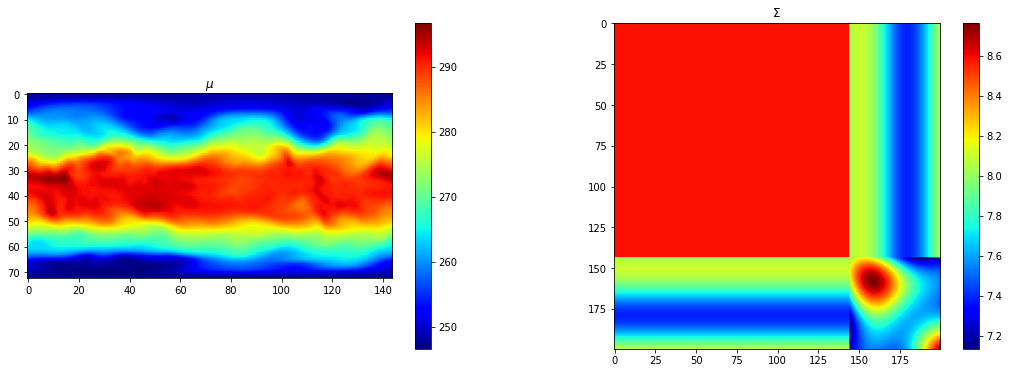

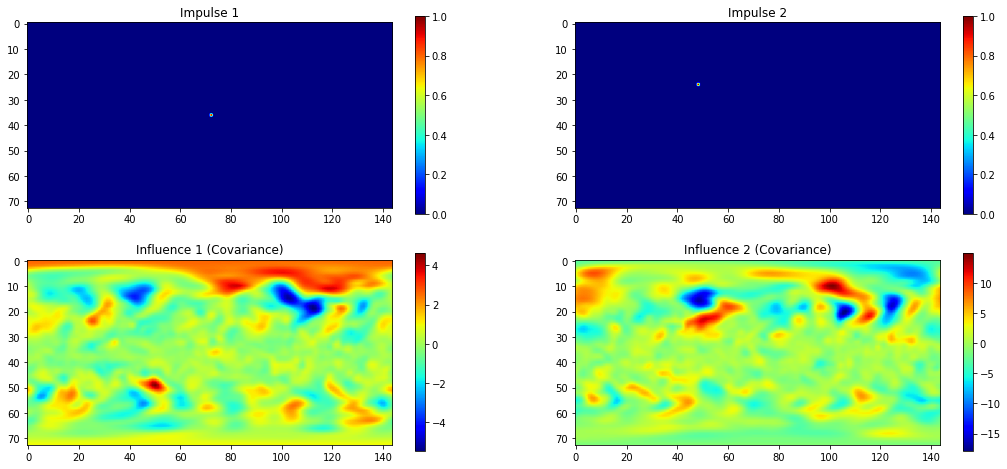

In [8]:
mu = np.mean(cnrm, axis=0)
covariance = np.cov(cnrm.reshape((9, -1)).transpose())

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('$\\mu$')
plt.imshow(mu, cmap='jet')
plt.colorbar()

plt.subplot(1,2,2)
plt.title('$\\Sigma$')
plt.imshow(covariance[:200,:200], cmap='jet')
plt.colorbar()

plt.show()

impulse1 = np.zeros_like(mu)
impulse1[mu.shape[0]//2,mu.shape[1]//2] = 1

impulse2 = np.zeros_like(mu)
impulse2[mu.shape[0]//3,mu.shape[1]//3] = 1

response1 = covariance @ impulse1.flatten()
response2 = covariance @ impulse2.flatten()

plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
plt.title('Impulse 1')
plt.imshow(impulse1, cmap='jet')
plt.colorbar()

plt.subplot(2,2,3)
plt.title('Influence 1 (Covariance)')
plt.imshow(response1.reshape(mu.shape), cmap='jet')
plt.colorbar()

plt.subplot(2,2,2)
plt.title('Impulse 2')
plt.imshow(impulse2, cmap='jet')
plt.colorbar()

plt.subplot(2,2,4)
plt.title('Influence 2 (Covariance)')
plt.imshow(response2.reshape(mu.shape), cmap='jet')
plt.colorbar()

plt.show()